# Lazada Product Exploration

### Audhi Aprilliant

In [3]:
import pandas as pd                   # Dataframe manipulation
import numpy as np                    # Mathematics operation
import matplotlib.pyplot as plt       # Data visualization
import seaborn as sns
from wordcloud import WordCloud       # Wordclouds
# N-Grams
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
from nltk.util import ngrams

## 2 Load the Data

In [4]:
data_lazada_viz = pd.read_csv('Datasets/interim/1 Lazada-product after Preprocessing.csv')

In [5]:
print('Dimension of Lazada data:\n{}'.format(data_lazada_viz.shape[0]),
      'rows and {}'.format(data_lazada_viz.shape[1]),'columns')
data_lazada_viz.head()

Dimension of Lazada data:
6735 rows and 2 columns


,title,category
0,lazada exclusive infinix smart gb dual camera ...,handphone
1,lazada special edition infinix hot gb triple c...,handphone
2,realme c hp murah mah battery octa core hio p ...,handphone
3,vivo y hp gb gb gb all screen inch mp hio p tr...,handphone
4,realme i hp gb gb gb gb qualcomm snapdragon ai...,handphone


In [6]:
print(data_lazada_viz['category'].value_counts())

makeup       2713
pakaian      2380
handphone    1642
Name: category, dtype: int64


## 3 Wordclouds for Each Categories

In [7]:
# Subsetting
data_makeup = data_lazada_viz.loc[data_lazada_viz['category'] == 'makeup',:]
data_pakaian = data_lazada_viz.loc[data_lazada_viz['category'] == 'pakaian',:]
data_handphone = data_lazada_viz.loc[data_lazada_viz['category'] == 'handphone',:]

### 1 MakeUp

In [8]:
wordcloud = WordCloud(background_color='white',
                      max_words=500,
                      max_font_size=40, 
                      random_state=42,
                      min_font_size = 10).generate(str(data_makeup['title']))

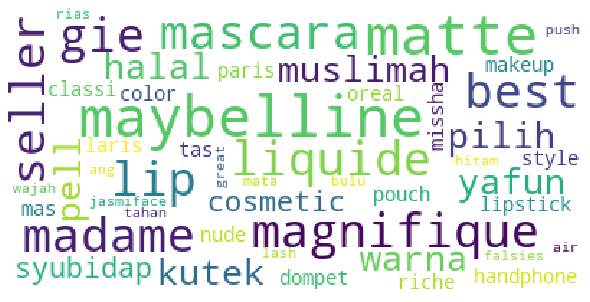

In [9]:
fig = plt.figure(figsize=(8,8),facecolor=None) 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('Reports/figures/Worcloud MakeUp.png',dpi=500)

### 2 Pakaian

In [10]:
wordcloud = WordCloud(background_color='white',
                      max_words=500,
                      max_font_size=40, 
                      random_state=42,
                      min_font_size = 10).generate(str(data_pakaian['title']))

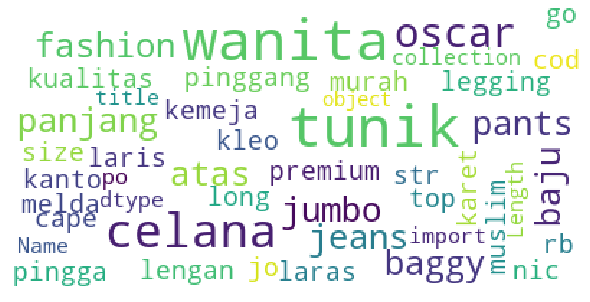

In [11]:
fig = plt.figure(figsize=(8,8),facecolor=None) 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('Reports/figures/Worcloud Pakaian.png',dpi=1000)

### Handphone

In [12]:
wordcloud = WordCloud(background_color='white',
                      max_words=500,
                      max_font_size=40, 
                      random_state=42,
                      min_font_size = 10).generate(str(data_handphone['title']))

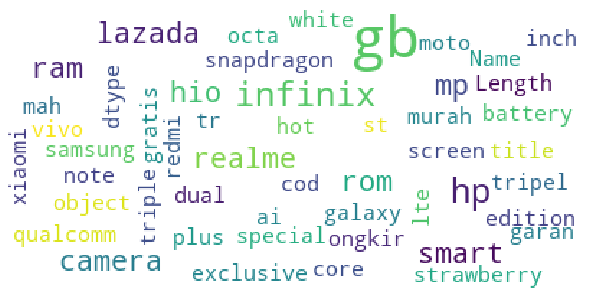

In [13]:
fig = plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('Reports/figures/Worcloud Handphone.png',dpi=1000)

## 4 Frequent Word in Each Categories

In [14]:
# Counting term frequency each categories
term_freq_makeup = pd.Series(' '.join(data_makeup['title']).split(' ')).value_counts()
term_freq_pakaian = pd.Series(' '.join(data_pakaian['title']).split(' ')).value_counts()
term_freq_handphone = pd.Series(' '.join(data_handphone['title']).split(' ')).value_counts()
# Convert to dataframe
term_freq_makeup = pd.DataFrame(term_freq_makeup)
term_freq_pakaian = pd.DataFrame(term_freq_pakaian)
term_freq_handphone = pd.DataFrame(term_freq_handphone)
# Column's names
term_freq_makeup.reset_index(level=0,inplace=True)
term_freq_pakaian.reset_index(level=0,inplace=True)
term_freq_handphone.reset_index(level=0,inplace=True)
term_freq_makeup.columns = ['Term','Freq']
term_freq_pakaian.columns = ['Term','Freq']
term_freq_handphone.columns = ['Term','Freq']

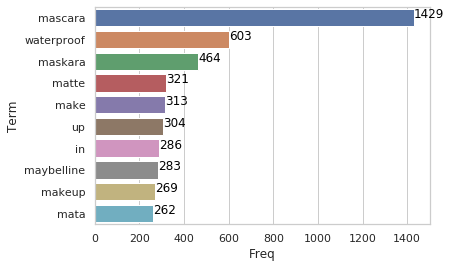

In [15]:
freq_term_makeup = term_freq_makeup[:10]
sns.set(style='whitegrid')
barplot = sns.barplot(x='Freq',y='Term',data=freq_term_makeup)
for index,row in freq_term_makeup.iterrows():
    barplot.text(x=row.Freq,y=row.name,s=row.Freq,color='black',ha='left')
plt.show()

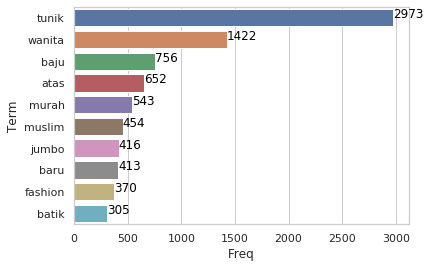

In [16]:
freq_term_pakaian = term_freq_pakaian[:10]
sns.set(style='whitegrid')
barplot = sns.barplot(x='Freq',y='Term',data=freq_term_pakaian)
for index,row in freq_term_pakaian.iterrows():
    barplot.text(x=row.Freq,y=row.name,s=row.Freq,color='black',ha='left')
plt.show()

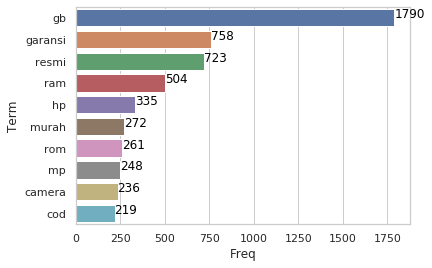

In [17]:
freq_term_handphone = term_freq_handphone[:10]
sns.set(style='whitegrid')
barplot = sns.barplot(x='Freq',y='Term',data=freq_term_handphone)
for index,row in freq_term_handphone.iterrows():
    barplot.text(x=row.Freq,y=row.name,s=row.Freq,color='black',ha='left')
plt.show()

## 5 N-Grams

In [34]:
# Determine n-grams
word_vectorizer = CountVectorizer(ngram_range=(1,3),analyzer='word')

### 5.1 MakeUp

In [35]:
sparse_matrix = word_vectorizer.fit_transform(data_handphone['title'])
frequencies = sum(sparse_matrix).toarray()[0]
# Dataframe of N-grams
ngrams_makeup = pd.DataFrame(frequencies,index=word_vectorizer.get_feature_names(),columns=['frequency'])
ngrams_makeup.reset_index(level=0,inplace=True)

In [36]:
# N-Grams
ngrams = []
for i in range(ngrams_makeup.shape[0]):
    ngrams.append(len(str.split(ngrams_makeup.iloc[i]['index'])))
ngrams = pd.Series(ngrams,name='NGrams')

In [37]:
# Merge dataframe
ngrams_makeup = pd.concat([ngrams_makeup,ngrams],axis=1)
ngrams_makeup = ngrams_makeup.sort_values(by='frequency',ascending=False)

In [38]:
ngrams_makeup[ngrams_makeup.NGrams == 1].head()

,index,frequency,NGrams
2608,gb,1790,1
2508,garansi,758,1
7523,resmi,723,1
7196,ram,504,1
3615,hp,335,1


In [39]:
ngrams_makeup[ngrams_makeup.NGrams == 2].head()

,index,frequency,NGrams
2531,garansi resmi,647,2
7201,ram gb,453,2
2725,gb gb,420,2
2717,gb garansi,248,2
7778,rom gb,234,2


### 5.2 Pakaian

In [40]:
sparse_matrix = word_vectorizer.fit_transform(data_pakaian['title'])
frequencies = sum(sparse_matrix).toarray()[0]
# Dataframe of N-grams
ngrams_pakaian = pd.DataFrame(frequencies,index=word_vectorizer.get_feature_names(),columns=['frequency'])
ngrams_pakaian.reset_index(level=0,inplace=True)

In [41]:
# N-Grams
ngrams = []
for i in range(ngrams_pakaian.shape[0]):
    ngrams.append(len(str.split(ngrams_pakaian.iloc[i]['index'])))
ngrams = pd.Series(ngrams,name='NGrams')

In [42]:
# Merge dataframe
ngrams_pakaian = pd.concat([ngrams_pakaian,ngrams],axis=1)
ngrams_pakaian = ngrams_pakaian.sort_values(by='frequency',ascending=False)

In [43]:
ngrams_pakaian[ngrams_pakaian.NGrams == 1].head()

,index,frequency,NGrams
18093,tunik,2973,1
20401,wanita,1422,1
1322,baju,756,1
635,atas,652,1
11866,murah,543,1


In [44]:
ngrams_pakaian[ngrams_pakaian.NGrams == 2].head()

,index,frequency,NGrams
19827,tunik wanita,325,2
899,atas wanita,249,2
21101,wanita tunik,192,2
18853,tunik jumbo,153,2
848,atas tunik,131,2


### 5.3 Handphone

In [45]:
sparse_matrix = word_vectorizer.fit_transform(data_handphone['title'])
frequencies = sum(sparse_matrix).toarray()[0]
# Dataframe of N-grams
ngrams_handphone = pd.DataFrame(frequencies,index=word_vectorizer.get_feature_names(),columns=['frequency'])
ngrams_handphone.reset_index(level=0,inplace=True)

In [46]:
# N-Grams
ngrams = []
for i in range(ngrams_handphone.shape[0]):
    ngrams.append(len(str.split(ngrams_handphone.iloc[i]['index'])))
ngrams = pd.Series(ngrams,name='NGrams')

In [47]:
# Merge dataframe
ngrams_handphone = pd.concat([ngrams_handphone,ngrams],axis=1)
ngrams_handphone = ngrams_handphone.sort_values(by='frequency',ascending=False)

In [48]:
ngrams_handphone[ngrams_handphone.NGrams == 1].head()

,index,frequency,NGrams
2608,gb,1790,1
2508,garansi,758,1
7523,resmi,723,1
7196,ram,504,1
3615,hp,335,1


In [49]:
ngrams_handphone[ngrams_handphone.NGrams == 2].head()

,index,frequency,NGrams
2531,garansi resmi,647,2
7201,ram gb,453,2
2725,gb gb,420,2
2717,gb garansi,248,2
7778,rom gb,234,2


## 6 3-Gram Network

For more info about network analysis in textual data, you can see [HERE](https://www.kaggle.com/arthurtok/ghastly-network-and-d3-js-force-directed-graphs)

In [77]:
# Preparing the data
n3grams_makeup = ngrams_makeup[ngrams_makeup.NGrams == 3]
n3grams_pakaian = ngrams_pakaian[ngrams_pakaian.NGrams == 3]
n3grams_handphone = ngrams_handphone[ngrams_handphone.NGrams == 3]

In [78]:
# Add categories
cat_makeup = pd.Series(['MakeUp']*n3grams_makeup.shape[0],name='cat')
cat_pakaian = pd.Series(['Pakaian']*n3grams_pakaian.shape[0],name='cat')
cat_handphone = pd.Series(['Handphone']*n3grams_handphone.shape[0],name='cat')
# Concate with each data
n3grams_makeup = pd.concat([n3grams_makeup,cat_makeup],axis=1)
n3grams_pakaian = pd.concat([n3grams_pakaian,cat_pakaian],axis=1)
n3grams_handphone = pd.concat([n3grams_handphone,cat_handphone],axis=1)
# Merge into one dataframe
trigram_df = pd.concat([n3grams_makeup.sort_values(by='frequency',ascending=False).head(20),
                        n3grams_pakaian.sort_values(by='frequency',ascending=False).head(20),
                        n3grams_handphone.sort_values(by='frequency',ascending=False).head(20)])

In [79]:
graph_net = nx.from_pandas_edgelist(trigram_df,source='cat',target='index')
print(nx.info(graph_net))

Name: 
Type: Graph
Number of nodes: 44
Number of edges: 52
Average degree:   2.3636


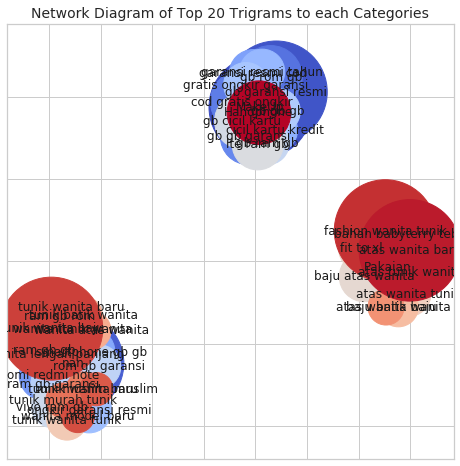

In [80]:
plt.figure(figsize=(8,8))
cmap = plt.cm.coolwarm
colors = [n for n in range(len(graph_net.nodes()))]
# k = 0.0319
k = 0.14
pos = nx.spring_layout(graph_net,k=k)
nx.draw_networkx(graph_net,pos,node_size=trigram_df['frequency'].values*50,cmap = cmap, 
                 node_color=colors,edge_color='grey',font_size=12,width=2,alpha=1)
plt.title('Network Diagram of Top 20 Trigrams to each Categories',fontsize=14)
plt.show()